In [1]:
import meep as mp
import meep.adjoint as mpa
from meep import Animate2D
import numpy as np
from autograd import numpy as npa
from autograd import tensor_jacobian_product, grad
import nlopt
from matplotlib import pyplot as plt
from matplotlib.patches import Circle
from meep.materials import Ag
import os
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from PIL import Image
import matplotlib.colors as mcolors

mp.verbosity(1)
TiO2 = mp.Medium(index=2.6)
SiO2 = mp.Medium(index=1.44)
Si = mp.Medium(index=3.4)
Air = mp.Medium(index=1)

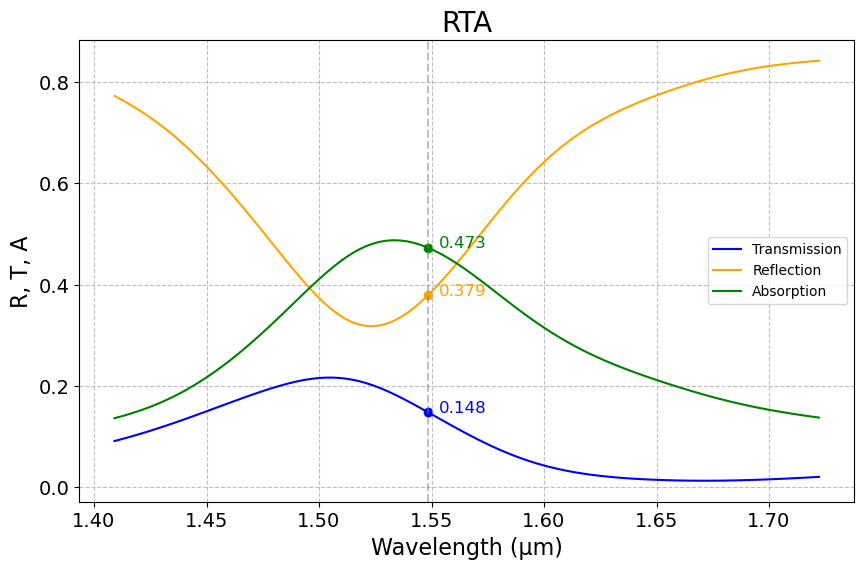

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 讀取資料
trans_freqs        = np.load('TRAN/trans_freqs.npy')
trans_wavelengths  = np.load('TRAN/trans_wavelengths.npy')
trans_empty_fluxes = np.load('TRAN/trans_empty_fluxes.npy')
trans_fluxes       = np.load('TRAN/trans_fluxes.npy')
trans_final        = np.load('TRAN/trans_final.npy')
ref_final          = np.load('TRAN/ref_final.npy')
abs_final          = np.load('TRAN/abs_final.npy')

# 找出最接近 1.55 μm 的點
target_wavelength = 1.55
idx_155 = np.argmin(np.abs(trans_wavelengths - target_wavelength))
w_155 = trans_wavelengths[idx_155]
t_155 = trans_final[idx_155]
r_155 = ref_final[idx_155]
a_155 = abs_final[idx_155]

# 繪圖
plt.figure(figsize=(10, 6))
plt.plot(trans_wavelengths, trans_final, label='Transmission', color='blue')
plt.plot(trans_wavelengths, ref_final, label='Reflection', color='orange')
plt.plot(trans_wavelengths, abs_final, label='Absorption', color='green')

# 標示 1550 nm 三個值
plt.axvline(x=w_155, color='gray', linestyle='--', alpha=0.5)

plt.scatter(w_155, t_155, color='blue')
plt.text(w_155 + 0.005, t_155, f'{t_155:.3f}', color='blue', fontsize=12)

plt.scatter(w_155, r_155, color='orange')
plt.text(w_155 + 0.005, r_155, f'{r_155:.3f}', color='orange', fontsize=12)

plt.scatter(w_155, a_155, color='green')
plt.text(w_155 + 0.005, a_155, f'{a_155:.3f}', color='green', fontsize=12)

# 格式
plt.xlabel('Wavelength (µm)', fontsize=16)
plt.ylabel('R, T, A', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('RTA', fontsize=20)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.8)

plt.show()


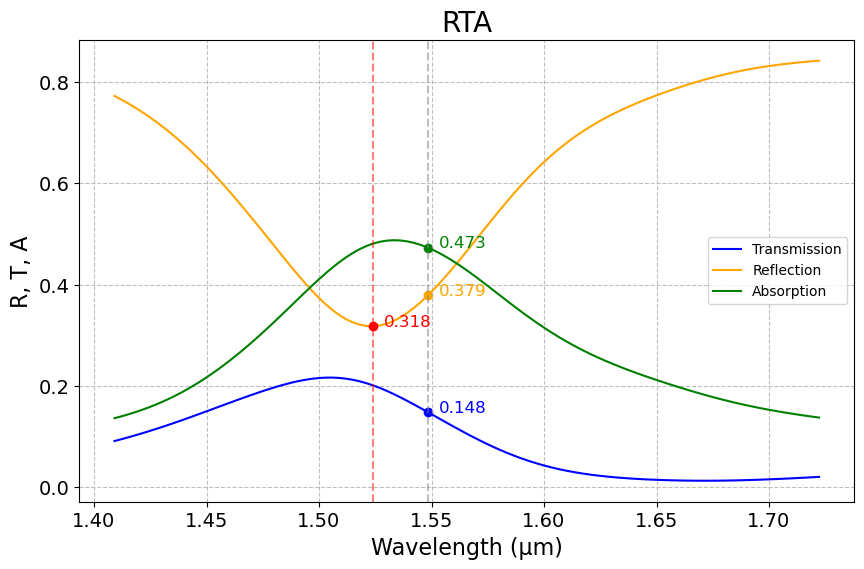

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 讀取資料
trans_freqs        = np.load('TRAN/trans_freqs.npy')
trans_wavelengths  = np.load('TRAN/trans_wavelengths.npy')
trans_empty_fluxes = np.load('TRAN/trans_empty_fluxes.npy')
trans_fluxes       = np.load('TRAN/trans_fluxes.npy')
trans_final        = np.load('TRAN/trans_final.npy')
ref_final          = np.load('TRAN/ref_final.npy')
abs_final          = np.load('TRAN/abs_final.npy')

# 找出最接近 1.55 μm 的點
target_wavelength = 1.55
idx_155 = np.argmin(np.abs(trans_wavelengths - target_wavelength))
w_155 = trans_wavelengths[idx_155]
t_155 = trans_final[idx_155]
r_155 = ref_final[idx_155]
a_155 = abs_final[idx_155]

# 找出反射最低點
idx_rmin = np.argmin(ref_final)
w_rmin = trans_wavelengths[idx_rmin]
r_rmin = ref_final[idx_rmin]

# 繪圖
plt.figure(figsize=(10, 6))
plt.plot(trans_wavelengths, trans_final, label='Transmission', color='blue')
plt.plot(trans_wavelengths, ref_final, label='Reflection', color='orange')
plt.plot(trans_wavelengths, abs_final, label='Absorption', color='green')

# 標示 1550 nm
plt.axvline(x=w_155, color='gray', linestyle='--', alpha=0.5)

plt.scatter(w_155, t_155, color='blue')
plt.text(w_155 + 0.005, t_155, f'{t_155:.3f}', color='blue', fontsize=12)

plt.scatter(w_155, r_155, color='orange')
plt.text(w_155 + 0.005, r_155, f'{r_155:.3f}', color='orange', fontsize=12)

plt.scatter(w_155, a_155, color='green')
plt.text(w_155 + 0.005, a_155, f'{a_155:.3f}', color='green', fontsize=12)

# 標示反射最低點
plt.scatter(w_rmin, r_rmin, color='red', zorder=5)
plt.text(w_rmin + 0.005, r_rmin, f'{r_rmin:.3f}', color='red', fontsize=12)
plt.axvline(x=w_rmin, color='red', linestyle='--', alpha=0.5)

# 格式
plt.xlabel('Wavelength (µm)', fontsize=16)
plt.ylabel('R, T, A', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('RTA', fontsize=20)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.8)

plt.show()


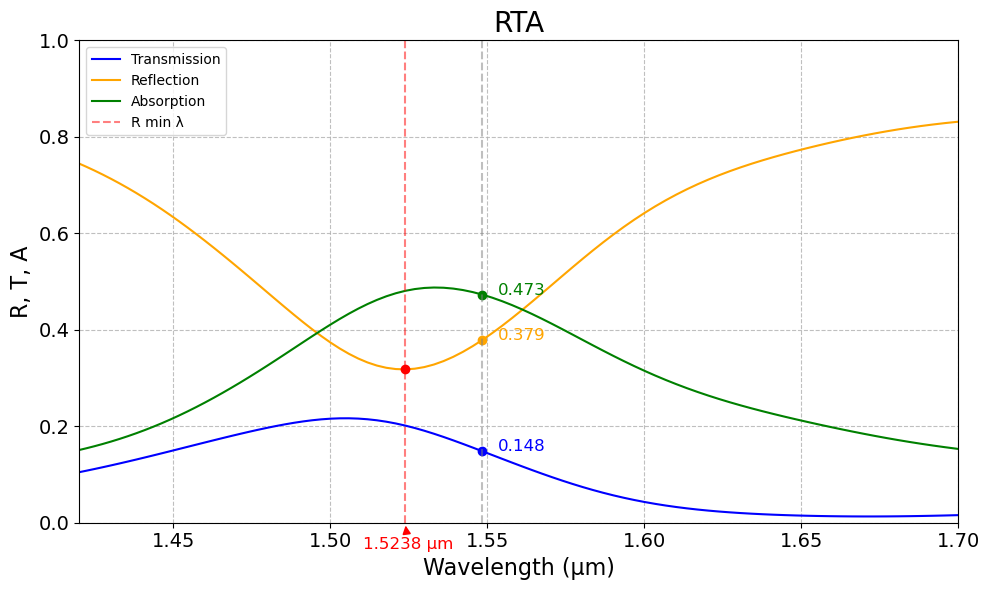

Closest to 1.55 µm -> λ=1.548436 µm, T=0.148093, R=0.379107, A=0.472800
Reflection minimum -> λ=1.523833 µm, R=0.317911


In [20]:
import numpy as np
import matplotlib.pyplot as plt

# 讀取資料
trans_freqs        = np.load('TRAN/trans_freqs.npy')
trans_wavelengths  = np.load('TRAN/trans_wavelengths.npy')
trans_empty_fluxes = np.load('TRAN/trans_empty_fluxes.npy')
trans_fluxes       = np.load('TRAN/trans_fluxes.npy')
trans_final        = np.load('TRAN/trans_final.npy')
ref_final          = np.load('TRAN/ref_final.npy')
abs_final          = np.load('TRAN/abs_final.npy')

# --- 找出最接近 1.55 μm 的點 ---
target_wavelength = 1.55
idx_155 = np.argmin(np.abs(trans_wavelengths - target_wavelength))
w_155 = trans_wavelengths[idx_155]
t_155 = trans_final[idx_155]
r_155 = ref_final[idx_155]
a_155 = abs_final[idx_155]

# --- 找出反射最低點 ---
idx_rmin = np.argmin(ref_final)
w_rmin = trans_wavelengths[idx_rmin]
r_rmin = ref_final[idx_rmin]

# --- 繪圖 ---
plt.figure(figsize=(10, 6))
plt.plot(trans_wavelengths, trans_final, label='Transmission', color='blue')
plt.plot(trans_wavelengths, ref_final, label='Reflection', color='orange')
plt.plot(trans_wavelengths, abs_final, label='Absorption', color='green')

# 標示 1550 nm（保留原本的數值）
plt.axvline(x=w_155, color='gray', linestyle='--', alpha=0.5)
plt.scatter(w_155, t_155, color='blue')
plt.text(w_155 + 0.005, t_155, f'{t_155:.3f}', color='blue', fontsize=12)
plt.scatter(w_155, r_155, color='orange')
plt.text(w_155 + 0.005, r_155, f'{r_155:.3f}', color='orange', fontsize=12)
plt.scatter(w_155, a_155, color='green')
plt.text(w_155 + 0.005, a_155, f'{a_155:.3f}', color='green', fontsize=12)

# 標示反射最低點（垂直線 + x 軸下方文字）
plt.axvline(x=w_rmin, color='red', linestyle='--', alpha=0.5, label='R min λ')
plt.scatter(w_rmin, r_rmin, color='red', zorder=5)
plt.annotate(f'{w_rmin:.4f} µm',
             xy=(w_rmin, 0), xycoords=('data', 'axes fraction'),
             xytext=(2, -10), textcoords='offset points',
             ha='center', va='top', color='red', fontsize=12,
             arrowprops=dict(arrowstyle='-|>', color='red', lw=1.2))

# 圖表格式
plt.xlabel('Wavelength (µm)', fontsize=16)
plt.ylabel('R, T, A', fontsize=16)
plt.title('RTA', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0,1)
plt.xlim(1.42,1.7)
plt.grid(True, linestyle='--', alpha=0.8)
plt.legend()

plt.tight_layout()
plt.show()

# 同步在終端印出數值
print(f'Closest to 1.55 µm -> λ={w_155:.6f} µm, T={t_155:.6f}, R={r_155:.6f}, A={a_155:.6f}')
print(f'Reflection minimum -> λ={w_rmin:.6f} µm, R={r_rmin:.6f}')
